# Loading libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

## Data splitting

### Loading a dataset for classification

In [73]:
churnData=pd.read_csv("Data/DATA_Customer-Churn.csv")

In [74]:
#Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [75]:
churnData["TotalCharges"]=pd.to_numeric(churnData["TotalCharges"],errors='coerce')

In [76]:
# droping nan values

churnData.dropna(inplace=True)

In [77]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges

churnData = churnData[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges","Churn"]]

In [82]:
#convert churn into 0 and 1 

def x_y_to_1_0(value:[str]=None, x="Yes", y="No"):
    if value == x:
        return 1
    elif value == y:
        return 0
    else:
        return None
    
churnData["Churn"] = list(map(x_y_to_1_0, churnData["Churn"]))

In [79]:
#X/Y Split

X=churnData.drop("Churn", axis=1)
y=churnData["Churn"]

## Logistic regression

,Error_metric,Train,Test
0,Accuracy,0.794311,0.781805
1,Precision,0.658266,0.675676
2,Recall,0.443916,0.439698


Confusion matrix for the train set
[[3815  339]
 [ 818  653]]


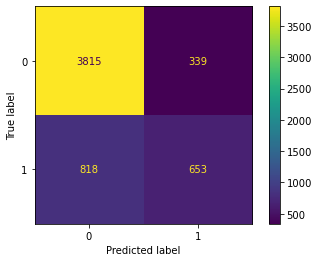



Confusion matrix for the test set
[[925  84]
 [223 175]]


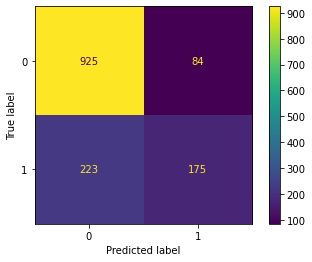

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN

,Error_metric,Train,Test
0,Accuracy,0.838756,0.759773
1,Precision,0.731527,0.600671
2,Recall,0.605710,0.449749


Confusion matrix for the train set
[[3827  327]
 [ 580  891]]


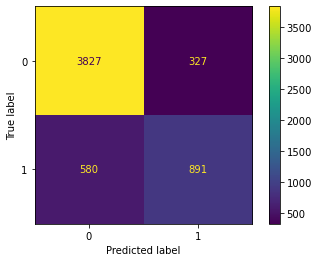



Confusion matrix for the test set
[[890 119]
 [219 179]]


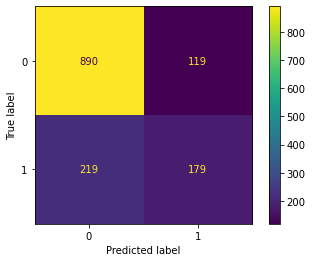

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier() 

knn_model.fit(X_train_mod, y_train)

y_pred_train_knn = knn_model.predict(X_train_mod)
y_pred_test_knn = knn_model.predict(X_test_mod)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(knn_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(knn_model,X_test_mod,y_test, values_format = 'd')
plt.show()